In [1]:
'''Combine the figure and make the result'''
#Date: 2020/07/01
#@Creator: Castrolin
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
image1 = cv2.imread('6112out.jpg')
image2 = cv2.imread('6114out.jpg')
image3 = cv2.imread('6115out.jpg')
image4 = cv2.imread('6116out.jpg')
image5 = cv2.imread('6117out.jpg')
image6 = cv2.imread('6118out.jpg')
image_base = cv2.imread(r'image_spatter_area/6120.PNG')

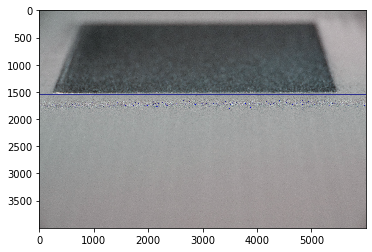

(4000, 6000, 3)


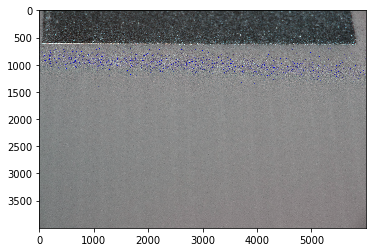

(4000, 6000, 3)


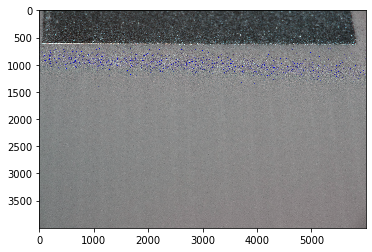

(4000, 6000, 3)


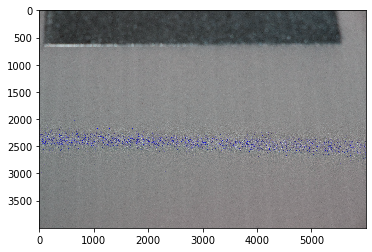

(4000, 6000, 3)


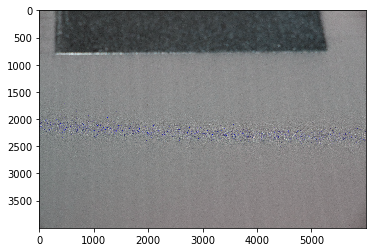

(4000, 6000, 3)


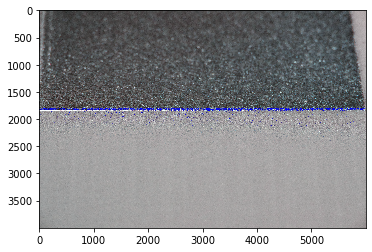

(4000, 6000, 3)


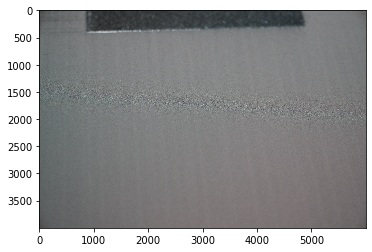

(4000, 6000, 3)


In [3]:
plt.imshow(image1)
plt.show()
print(image1.shape)

plt.imshow(image2)
plt.show()
print(image2.shape)

plt.imshow(image3)
plt.show()
print(image3.shape)

plt.imshow(image4)
plt.show()
print(image4.shape)

plt.imshow(image5)
plt.show()
print(image5.shape)

plt.imshow(image6)
plt.show()
print(image6.shape)

plt.imshow(image_base)
plt.show()
print(image_base.shape)

In [2]:
imgCut6112 = image1[1500:2000,:,:]
imgCut6114 = image2[600:1300,:,:]
imgCut6115 = image3[600:1300,:,:]
imgCut6116 = image4[2000:2600,:,:]
imgCut6117 = image5[2000:2600,:,:]
imgCut6118 = image6[2000:2600,:,:]

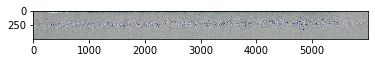

(500, 6000, 3)


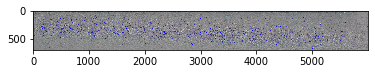

(700, 6000, 3)


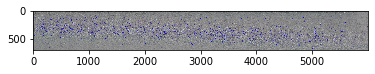

(700, 6000, 3)


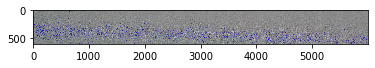

(600, 6000, 3)


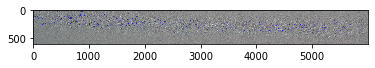

(600, 6000, 3)


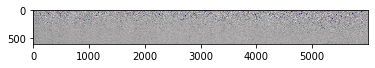

(600, 6000, 3)


In [8]:
plt.imshow(imgCut6112)
plt.show()
print(imgCut6112.shape)

plt.imshow(imgCut6114)
plt.show()
print(imgCut6114.shape)


plt.imshow(imgCut6115)
plt.show()
print(imgCut6115.shape)


plt.imshow(imgCut6116)
plt.show()
print(imgCut6116.shape)

plt.imshow(imgCut6117)
plt.show()
print(imgCut6117.shape)


plt.imshow(imgCut6118)
plt.show()
print(imgCut6118.shape)


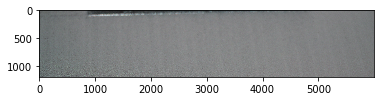

In [13]:
plt.imshow(image_base[310:1500,:,:])
plt.show()

In [33]:
image_copy = image_base.copy()
image_copy[310:810,:,:] = imgCut6112
image_copy[810:1310,1200:5200,:] = imgCut6114[200:imgCut6114.shape[1],0:4000,:]
image_copy[1010:1610,1400:5400,:] = imgCut6115[100:imgCut6114.shape[1],0:4000,:]
image_copy[1610:2110,1600:5600,:] = imgCut6117[100:imgCut6114.shape[1],0:4000,:]
#image_copy[1610:2110,:,:] = imgCut6117[100:imgCut6114.shape[1],:,:]
cv2.imshow('image',image_copy)
cv2.waitKey(0)

113

In [36]:
image_try = image_base.copy()
image_try[410:910,1000:5000,:] = imgCut6114[200:imgCut6114.shape[1],0:4000,:]
image_try[910:1510,1100:5100,:] = imgCut6115[100:imgCut6114.shape[1],0:4000,:]
image_try[1210:1710,1200:5200,:] = imgCut6117[100:imgCut6114.shape[1],0:4000,:]
cv2.imshow('image',image_try)
cv2.waitKey(0)

113

In [29]:
#color detection
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
imgCut6114 = cv2.cvtColor(imgCut6114,cv2.COLOR_BGR2HSV)
imgCut6115 = cv2.cvtColor(imgCut6115,cv2.COLOR_BGR2HSV)
imgCut6118 = cv2.cvtColor(imgCut6118,cv2.COLOR_BGR2HSV)

mask1 = cv2.inRange(imgCut6114, lower_red, upper_red)
mask2 = cv2.inRange(imgCut6115, lower_red, upper_red)
mask3 = cv2.inRange(imgCut6118, lower_red, upper_red)

out = cv2.bitwise_and(imgCut6114,imgCut6114,mask = mask1)
out_1 = cv2.bitwise_and(imgCut6115,imgCut6115,mask = mask2)
out_2 = cv2.bitwise_and(imgCut6118,imgCut6118,mask = mask3)
#R channel make it 
out[:,:,0]=0
out[:,:,1]=0
out_1[:,:,0]=0
out_1[:,:,1]=0
out_2[:,:,0]=0
out_2[:,:,1]=0

cv2.imshow('i1',out)
cv2.imshow('i2',out_1)
cv2.imshow('i3',out_2)
cv2.waitKey(0)

113

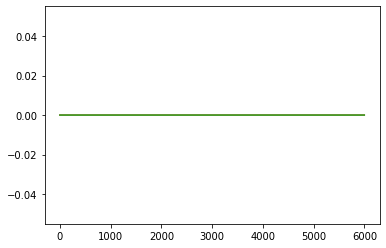

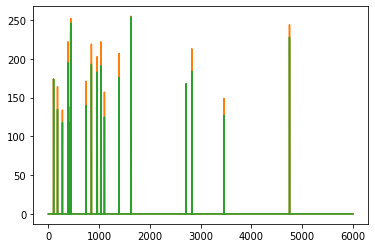

113

In [28]:
image_try = cv2.imread(r'image_spatter_area/6112.PNG')
n= 0
for i in np.arange(1600,2100):
    for j in np.arange(0,image_try.shape[1]):
        if out[n,j,2]!= 0:
            image_try[i,j,:]=out[n,j,:]
    n=n+1
n= 0
for i in np.arange(1800,2300):
    for j in np.arange(0,image_try.shape[1]):
        if out_1[n,j,2]!= 0:
            image_try[i,j,:]=out_1[n,j,:]
    n=n+1
n= 0
for i in np.arange(1700,2200):
    for j in np.arange(0,image_try.shape[1]):
        if out_2[n,j,2]!= 0:
            image_try[i,j,:]=out_2[n,j,:]
    n=n+1
    
cv2.imshow('image',image_try)
cv2.waitKey(0)

113